#Final - Practice Part

##1. Importing all necessary libraries for further work

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, KFold
from sklearn.datasets import load_digits, make_blobs, make_classification
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, silhouette_score, roc_curve, roc_auc_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

##2. Reading the document with dataset

In [21]:
df1 = pd.read_csv('ml11.csv')

##3. Checking the dataset by the first and the last 5 rows

In [22]:
df1.head()

,Gender,age,Supporting_team,Average_time_per_month,Most_often_attend,Uniform,level_of_football,Improvement,hours_per_day
0,Female,20,Evolution,5+,Pride,Old School,4.0,3.0,2.0
1,Male,20,Evolution,15+,Evolution,Evolution,4.0,4.0,3.0
2,Male,20,Pride,10+,Snow Kids,Old School,4.0,3.0,2.0
3,Male,19,Pride,20+,Pride,Pride,4.0,4.0,3.0
4,Female,21,Snow Kids,20+,Snow Kids,Old School,5.0,5.0,3.0


In [4]:
df1.tail()

,Gender,age,Supporting_team,Average_time_per_month,Most_often_attend,Uniform,level_of_football,Improvement,hours_per_day
146,Female,21,Pride,0,Pride,Pride,NaN,3.0,0.0
147,Female,20,Snow Kids,5+,Snow Kids,Snow Kids,5.0,4.0,1.0
148,Male,18,Sunkar,10+,Snow Kids,Sunkar,4.0,3.0,2.0
149,Female,21,Snow Kids,5+,Snow Kids,Snow Kids,3.0,3.0,0.0
150,Male,20,NaN,0,NaN,Evolution,5.0,3.0,0.0


##4. Data Preprocessing

###4.1 Deleting N/A values

####4.1.1 Checking to null values

In [5]:
df1.isnull().sum()

Gender                    0
age                       0
Supporting_team           3
Average_time_per_month    1
Most_often_attend         4
Uniform                   0
level_of_football         2
Improvement               2
hours_per_day             1
dtype: int64

####4.1.2 Dropping n/a cells

In [6]:
df2=df1.dropna()

####4.1.3 Checking the number of cells in columns in order to know whether the n/a-s were deleted or not

In [7]:
df2.count()

Gender                    143
age                       143
Supporting_team           143
Average_time_per_month    143
Most_often_attend         143
Uniform                   143
level_of_football         143
Improvement               143
hours_per_day             143
dtype: int64

###4.2 Deleting duplicates

####4.2.1 Finding and Dropping all duplicates

In [8]:
duplicate_rows = df2[df2.duplicated()]
df3 = df2.drop_duplicates()

####4.2.2 Checking the number of cells in columns after dropping duplicates

In [9]:
df3.count()

Gender                    141
age                       141
Supporting_team           141
Average_time_per_month    141
Most_often_attend         141
Uniform                   141
level_of_football         141
Improvement               141
hours_per_day             141
dtype: int64

###4.3 Deleting outliers

####4.3.1 Checking data types to find outliers

In [10]:
df3.dtypes

Gender                     object
age                         int64
Supporting_team            object
Average_time_per_month     object
Most_often_attend          object
Uniform                    object
level_of_football         float64
Improvement               float64
hours_per_day             float64
dtype: object

####4.3.2 Identifying and dropping outliers in the data about how many times people buy ice cream in a week

In [11]:
Q1 = df3['age'].quantile(0.25)
Q3 = df3['age'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

df4 = df3[(df3['age'] >= lower_bound) & (df3['age'] <= upper_bound)]

df4.head()

,Gender,age,Supporting_team,Average_time_per_month,Most_often_attend,Uniform,level_of_football,Improvement,hours_per_day
0,Female,20,Evolution,5+,Pride,Old School,4.0,3.0,2.0
1,Male,20,Evolution,15+,Evolution,Evolution,4.0,4.0,3.0
2,Male,20,Pride,10+,Snow Kids,Old School,4.0,3.0,2.0
3,Male,19,Pride,20+,Pride,Pride,4.0,4.0,3.0
4,Female,21,Snow Kids,20+,Snow Kids,Old School,5.0,5.0,3.0


####4.3.5 Checking the number of cells in columns after dropping all outliers

In [12]:
df4.count()

#there is no outliers in dataset

Gender                    141
age                       141
Supporting_team           141
Average_time_per_month    141
Most_often_attend         141
Uniform                   141
level_of_football         141
Improvement               141
hours_per_day             141
dtype: int64

##5. Renaming the data to use in coding easily
###5.1 Changing data from column to the numerical values for further usage

###5.1 Changing categories to the numerical values for further usage

In [17]:
df4.loc[df4['Average_time_per_month'] == '0', 'Average_time_per_month'] = '0'
df4.loc[df4['Average_time_per_month'] == '0']
df4.loc[df4['Average_time_per_month'] == '5+', 'Average_time_per_month'] = '5'
df4.loc[df4['Average_time_per_month'] == '5']
df4.loc[df4['Average_time_per_month'] == '10+', 'Average_time_per_month'] = '10'
df4.loc[df4['Average_time_per_month'] == '10']
df4.loc[df4['Average_time_per_month'] == '15+', 'Average_time_per_month'] = '15'
df4.loc[df4['Average_time_per_month'] == '15']
df4.loc[df4['Average_time_per_month'] == '20+', 'Average_time_per_month'] = '20'
df4.loc[df4['Average_time_per_month'] == '20']
df4.head(3)

#renaming avarage values for proper further use and creating new column

,Gender,age,Supporting_team,Average_time_per_month,Most_often_attend,Uniform,level_of_football,Improvement,hours_per_day
0,Female,20,Evolution,5,Pride,Old School,4.0,3.0,2.0
1,Male,20,Evolution,15,Evolution,Evolution,4.0,4.0,3.0
2,Male,20,Pride,10,Snow Kids,Old School,4.0,3.0,2.0


###5.2 Checking data types to recornize data type of 'Average_time_per_month'

In [18]:
df4.dtypes

Gender                     object
age                         int64
Supporting_team            object
Average_time_per_month     object
Most_often_attend          object
Uniform                    object
level_of_football         float64
Improvement               float64
hours_per_day             float64
dtype: object

###5.3 Changing current data type of 'Average_time_per_month' to integer for further proper work

In [19]:
df4['Average_time_per_month'] = df4['Average_time_per_month'].astype(int)

#changing type of the column from object to integer for the proper further use

###5.4 Checking of corrected data type

In [23]:
df4.dtypes

Gender                     object
age                         int64
Supporting_team            object
Average_time_per_month      int64
Most_often_attend          object
Uniform                    object
level_of_football         float64
Improvement               float64
hours_per_day             float64
dtype: object

##6. Adding the new column "hours_per_month"


In [24]:
df4['hours_per_month']=df4['Average_time_per_month']*df4['hours_per_day']
df4.head(3)

,Gender,age,Supporting_team,Average_time_per_month,Most_often_attend,Uniform,level_of_football,Improvement,hours_per_day,hours_per_month
0,Female,20,Evolution,5,Pride,Old School,4.0,3.0,2.0,10.0
1,Male,20,Evolution,15,Evolution,Evolution,4.0,4.0,3.0,45.0
2,Male,20,Pride,10,Snow Kids,Old School,4.0,3.0,2.0,20.0


#Supervised Learning Models

##1. Logistic Regression

###1.1 Choosing the variables

In [25]:
X = df4[['Average_time_per_month', 'hours_per_day', 'hours_per_month']]
y = df4['level_of_football']

###1.2 Train and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

###1.3 Checking the fitting of logistic regression

In [27]:
logisticRegr = LogisticRegression()

In [28]:
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###1.4 Finding test accuracy

In [29]:
Y_pred = logisticRegr.predict(X_test)

In [30]:
print('Accuracy: %.5f' % accuracy_score(y_test, Y_pred))

Accuracy: 0.44828


###1.5 Finding other analytic scores

In [31]:
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[ 0  0  0  0  0]
 [ 1  0  1  0  2]
 [ 0  0  1  1  2]
 [ 0  0  1  1  4]
 [ 0  0  2  2 11]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         4
         3.0       0.20      0.25      0.22         4
         4.0       0.25      0.17      0.20         6
         5.0       0.58      0.73      0.65        15

    accuracy                           0.45        29
   macro avg       0.21      0.23      0.21        29
weighted avg       0.38      0.45      0.41        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

###1.6 Building confusion matrix

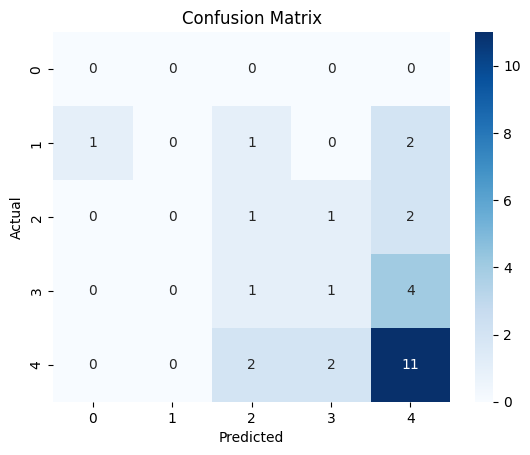

In [32]:
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

###1.7 Checking the model on under-/overfitting or well fitted

In [33]:
train_acc = accuracy_score(y_train, logisticRegr.predict(X_train))
test_acc = accuracy_score(y_test, logisticRegr.predict(X_test))

if train_acc > test_acc:
    print("The model is overfitting.")
elif train_acc < test_acc:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

The model is underfitting.


###1.8 Choosing the method of regularization

In [34]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
model_l1.fit(X_train, y_train)

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)
model_l2.fit(X_train, y_train)

train_acc_l1 = accuracy_score(y_train, model_l1.predict(X_train))
test_acc_l1 = accuracy_score(y_test, model_l1.predict(X_test))
train_acc_l2 = accuracy_score(y_train, model_l2.predict(X_train))
test_acc_l2 = accuracy_score(y_test, model_l2.predict(X_test))

if train_acc_l1 > test_acc_l1 and train_acc_l2 > test_acc_l2:
    print("Both models are overfitting.")
elif train_acc_l1 < test_acc_l1 and train_acc_l2 < test_acc_l2:
    print("Both models are underfitting.")
elif test_acc_l1 > test_acc_l2:
    print("The L1 regularized model is better.")
else:
    print("The L2 regularized model is better.")


Both models are underfitting.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###1.9 Using L2(Ridge) Regularization

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(penalty='l2', C=0.1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.4107142857142857
Testing accuracy: 0.4827586206896552


###1.10 Finding best hyperparameter

In [36]:
model = LogisticRegression()

hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best mean cross-validated score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy using the best model:", train_accuracy)
print("Testing accuracy using the best model:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Best mean cross-validated score: 0.3928853754940712
Training accuracy using the best model: 0.4375
Testing accuracy using the best model: 0.4482758620689655


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

###1.11 Plotting of learning curves

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


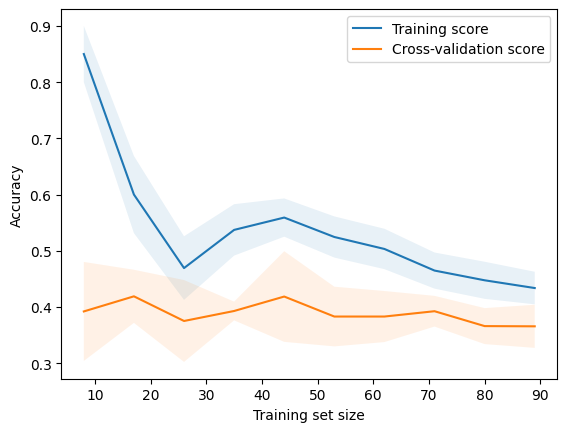

In [37]:
model = LogisticRegression(penalty='l2', C=1)

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

## Linear Regression

###2.1 Creating correlation map to choose correct variables

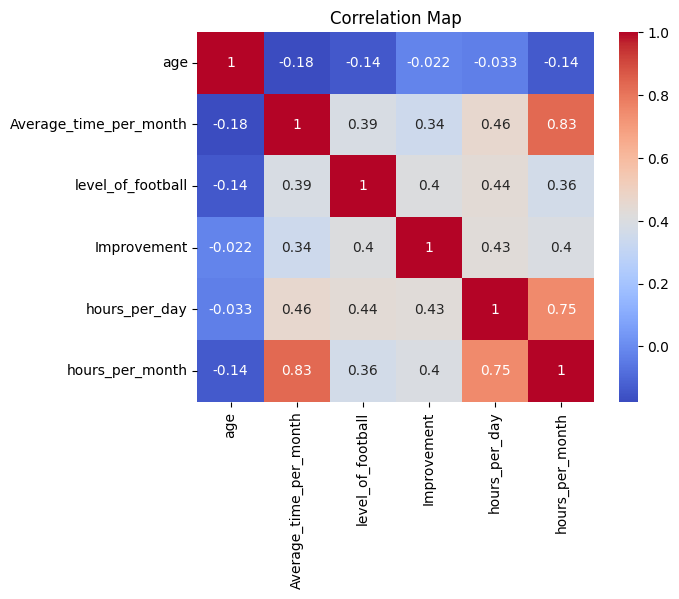

In [40]:
numeric_columns = df4.select_dtypes(include=['int', 'float']).columns
corr = df4[numeric_columns].corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)

plt.title('Correlation Map')
plt.show()

###2.2 Choosing variables for linear regression

In [80]:
x = df4['hours_per_month'].values.reshape(-1,1)
Y = df4['Average_time_per_month'].values.reshape(-1,1)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

###2.3 Checking variables to fitting on the linear regression

In [82]:
regression = LinearRegression()
regression.fit(x_train, Y_train)

LinearRegression()

###2.4 Plotting traning set linear regression model

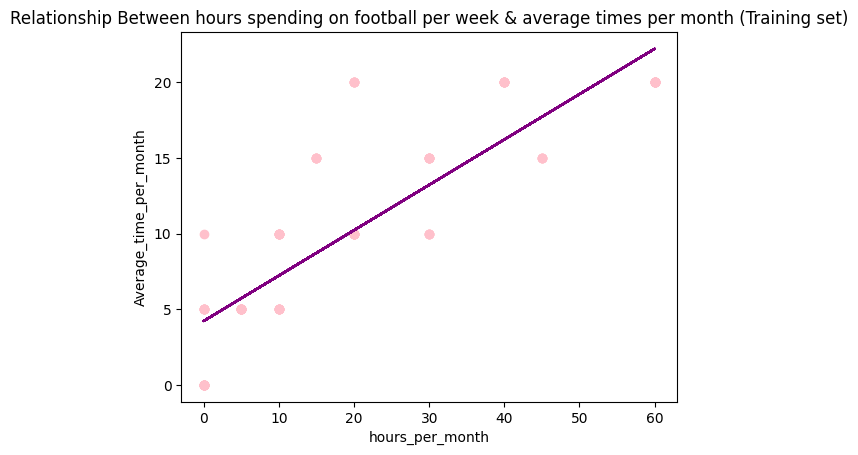

In [83]:
Vtrain = plt
Vtrain.scatter(x_train, Y_train, color='pink')
Vtrain.plot(x_train, regression.predict(x_train), color='purple')
Vtrain.title('Relationship Between hours spending on football per week & average times per month (Training set)')
Vtrain.xlabel('hours_per_month')
Vtrain.ylabel('Average_time_per_month')
Vtrain.show()

###2.5 Plotting test set linear regression model

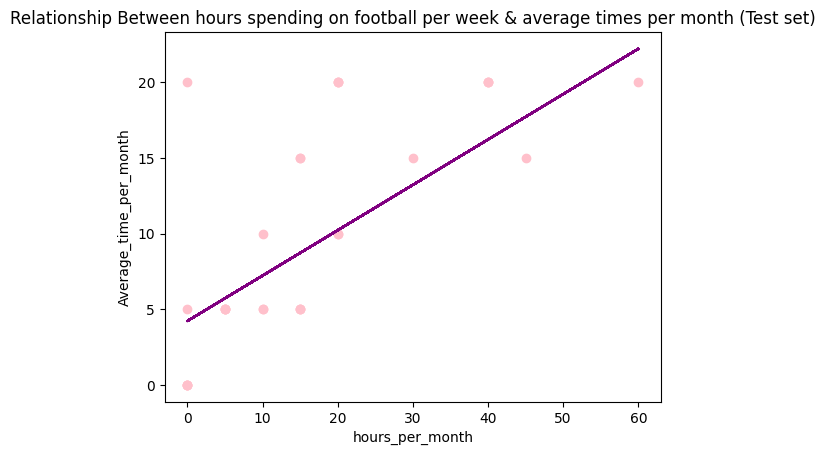

In [84]:
Vtest = plt
Vtest.scatter(x_test, Y_test, color='pink')
Vtest.plot(x_train, regression.predict(x_train), color='purple')
Vtrain.title('Relationship Between hours spending on football per week & average times per month (Test set)')
Vtrain.xlabel('hours_per_month')
Vtrain.ylabel('Average_time_per_month')
Vtest.show()

###2.6 Finding evaluation metrics

In [85]:
y_pred = regression.predict(x_test)

In [86]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test,y_pred)
print("RMSE: ", rmse)
print("R-squared: ", r2)
print("MSE:", mse)

RMSE:  5.273214569159225
R-squared:  0.47858390230763415
MSE: 27.80679189239311


###2.7 Checking the model to fitting on linear regression

In [87]:
x_train, x_val, Y_train, Y_val = train_test_split(x, Y, test_size=0.2, random_state=42)

In [88]:
regression = LinearRegression()
regression.fit(x_train, Y_train)

LinearRegression()

###2.8 Preparation to identifying over-/underfitting or well fitted model

In [89]:
Y_train_pred = regression.predict(x_train)
train_score = r2_score(Y_train, Y_train_pred)

In [90]:
Y_val_pred = regression.predict(x_val)
val_score = r2_score(Y_val, Y_val_pred)

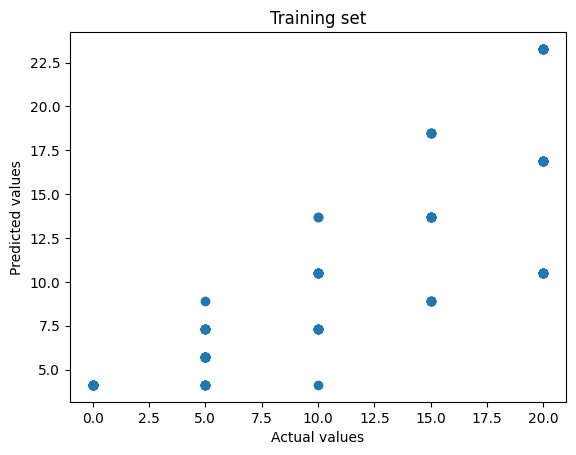

In [91]:
plt.scatter(Y_train, Y_train_pred, label='Training data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Training set')
plt.show()

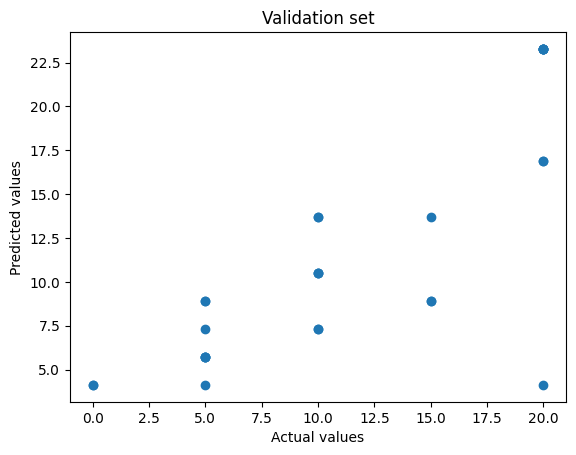

In [92]:
plt.scatter(Y_val, Y_val_pred, label='Validation data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Validation set')
plt.show()

###2.9 Checking to over-/underfitting or well-fitted model

In [93]:
train_mse = mean_squared_error(Y_train, regression.predict(x_train))
test_mse = mean_squared_error(Y_test, regression.predict(x_test))

if train_mse > test_mse:
  print('The model is overfitting the data.')
elif train_mse < test_mse:
  print('The model is underfitting the data.')
else:
  print('The model is well fitting.')

The model is underfitting the data.


###2.10 Choosing type of regularization

In [94]:
if val_score < 0.5:
    ridge_model = Ridge(alpha=0.1)
    ridge_model.fit(x_train, Y_train)
    Y_val_pred = ridge_model.predict(x_val)
    val_score = r2_score(Y_val, Y_val_pred)
    model = ridge_model
else:
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(x_train, Y_train)
    Y_val_pred = lasso_model.predict(x_val)
    val_score = r2_score(Y_val, Y_val_pred)
    model = lasso_model

###2.11 Fitting Lasso method of regularization

In [95]:
model.fit(x, Y)

Lasso(alpha=0.1)

###2.12 Plotting regularized model

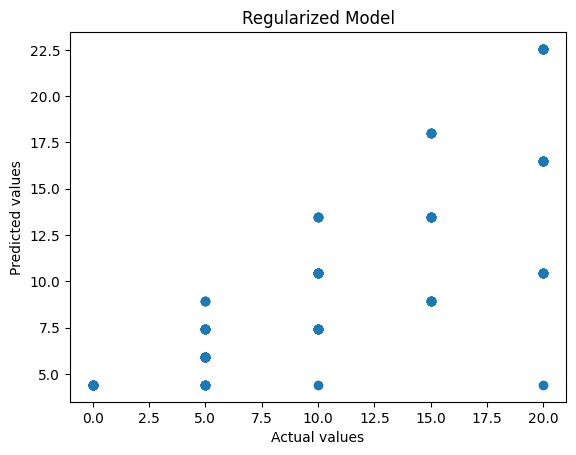

In [96]:
Y_pred = model.predict(x)
plt.scatter(Y, Y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Regularized Model')
plt.show()

###2.13 Finding new evaluation metrics after regularization

In [97]:
Rmse2 = np.sqrt(mean_squared_error(Y_val, Y_val_pred))
R22 = r2_score(Y_val, Y_val_pred)
Mse2 = mean_squared_error(Y_val, Y_val_pred)
print("RMSE: ", Rmse2)
print("R-squared: ", R22)
print("MSE:", Mse2)

RMSE:  4.260650986975122
R-squared:  0.5966500267795254
MSE: 18.15314683281208


###2.14 Plotting learning curve

In [98]:
model = Lasso(alpha=1.0)

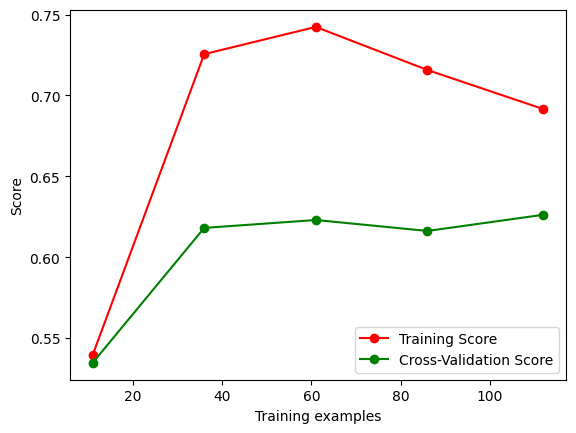

In [99]:
train_sizes, train_scores, test_scores = learning_curve(model, x, Y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

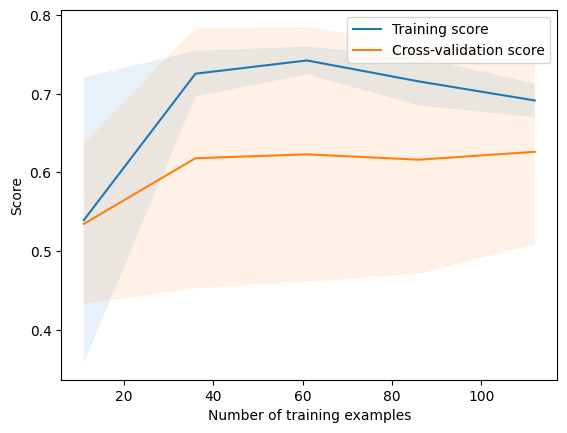

In [103]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

###2.15 Finding the best hyperparameter

In [104]:
x, Y = make_classification(n_samples=1000, random_state=42)

In [105]:
m = RandomForestClassifier()

In [106]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [107]:
grid = GridSearchCV(estimator=m, param_grid=param_grid, cv=5, n_jobs=-1)

In [108]:
grid_result = grid.fit(x, Y)

In [109]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.899000 using {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


#Unsupervised Learning Model

##3. Clustering

###3.1 Using silhouette to make clustering through cross-validation

In [110]:
# Select columns for clustering
X = df4[['Average_time_per_month', 'hours_per_month']]

# Define number of folds for cross validation
n_folds = 5

# Initialize KMeans clustering algorithm
clustering_model = KMeans(n_clusters=3)

# Initialize KFold cross validation
kfold = KFold(n_splits=n_folds)

# Initialize list to store silhouette scores for each fold
silhouette_scores = []

# Loop over each fold
for train_index, test_index in kfold.split(X):

    # Get training and test data for the fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]

    # Fit the clustering model on the training data
    clustering_model.fit(X_train)

    # Predict the clusters for the test data
    y_pred = clustering_model.predict(X_test)

    # Calculate the silhouette score for the predicted clusters
    score = silhouette_score(X_test, y_pred)

    # Append the silhouette score to the list
    silhouette_scores.append(score)

# Calculate the average silhouette score across all folds
avg_silhouette_score = sum(silhouette_scores) / len(silhouette_scores)

# Print the average silhouette score
print('Average Silhouette Score:', avg_silhouette_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Average Silhouette Score: 0.6037373866623094


In [113]:
# Select the columns to use for clustering
a = df4[['Average_time_per_month', 'hours_per_month']].values

# Perform clustering with k=3
kmeans = KMeans(n_clusters=5, random_state=0).fit(a)

# Add the cluster labels as a new column in the dataframe
df4['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###3.2 Plotting clustering

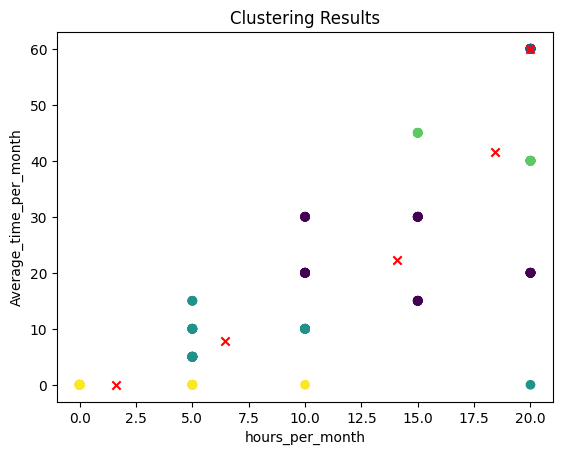

In [114]:
# Create a scatter plot of the data, colored by cluster label
plt.scatter(df4['Average_time_per_month'], df4['hours_per_month'], c=df4['cluster'])

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')

# Add axis labels and a title
plt.xlabel('hours_per_month')
plt.ylabel('Average_time_per_month')
plt.title('Clustering Results')

# Show the plot
plt.show()

###3.3 Making a plot by Elbow method to check model on over-/unerfitting or well fitted



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

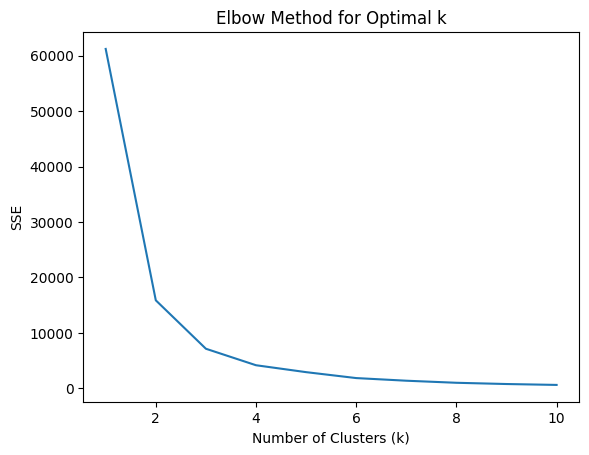

In [115]:
a = df4[['hours_per_month', 'Average_time_per_month']].values

# Define the range of k values to try
k_range = range(1, 11)

# Initialize an empty list to store the SSE values for each k
sse = []

# Loop over the range of k values
for k in k_range:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k)

    # Fit the model to the data
    kmeans.fit(a)

    # Calculate the SSE value for the current k value
    sse.append(kmeans.inertia_)

# Plot the SSE values against the range of k values
plt.plot(k_range, sse)

# Add labels and a title to the plot
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')

# Show the plot
plt.show()

###3.3 Making a plot by silhouette method to check model on over-/unerfitting or well fitted


In [116]:
# Fit a KMeans model with varying numbers of clusters
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(a)

    # Calculate the silhouette score
    score = silhouette_score(a, labels)

    print(f'k={k}, silhouette score={score:.2f}')

k=2, silhouette score=0.65
k=3, silhouette score=0.61
k=4, silhouette score=0.61
k=5, silhouette score=0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


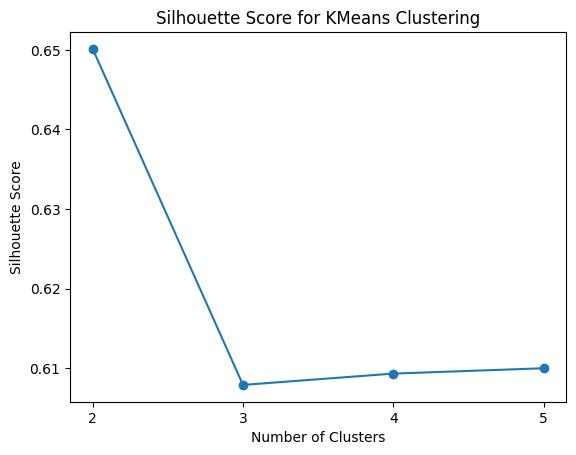

In [117]:
# Set the range of numbers of clusters to try
k_range = range(2, 6)

# Initialize list to store the silhouette scores
silhouette_scores = []

# Fit a KMeans model with varying numbers of clusters and calculate the silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(a)
    labels = kmeans.labels_
    score = silhouette_score(a, labels)
    silhouette_scores.append(score)

# Plot the silhouette score as a function of the number of clusters
fig, ax = plt.subplots()
ax.plot(k_range, silhouette_scores, marker='o')
ax.set_xticks(k_range)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score for KMeans Clustering')

# Show the plot
plt.show()

###3.4 Checking the data on over-/underfitting or well-fitted

In [118]:
if score > 1:
  print('The model is overfitting the data.')
elif score < -1:
  print('The model is underfitting the data.')
else:
  print('The model is well fitting.')

The model is well fitting.


In [ ]:
df4['Most_often_attend'].value_counts()

In [121]:
s = df4['hours_per_month'].values.reshape(-1,1)
f = df4['Supporting_team'].values.reshape(-1,1)
s_train, s_test, f_train, f_test = train_test_split(s, f, test_size=0.2, random_state=0)

In [122]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
m = DecisionTreeClassifier(random_state=42)
m.fit(s_train, f_train)

DecisionTreeClassifier(random_state=42)

In [123]:
f_pred = m.predict(s_test)

In [124]:
from sklearn import metrics
accuracy = metrics.accuracy_score(f_test, f_pred)
print("Accuracy:", accuracy)

Accuracy: 0.27586206896551724


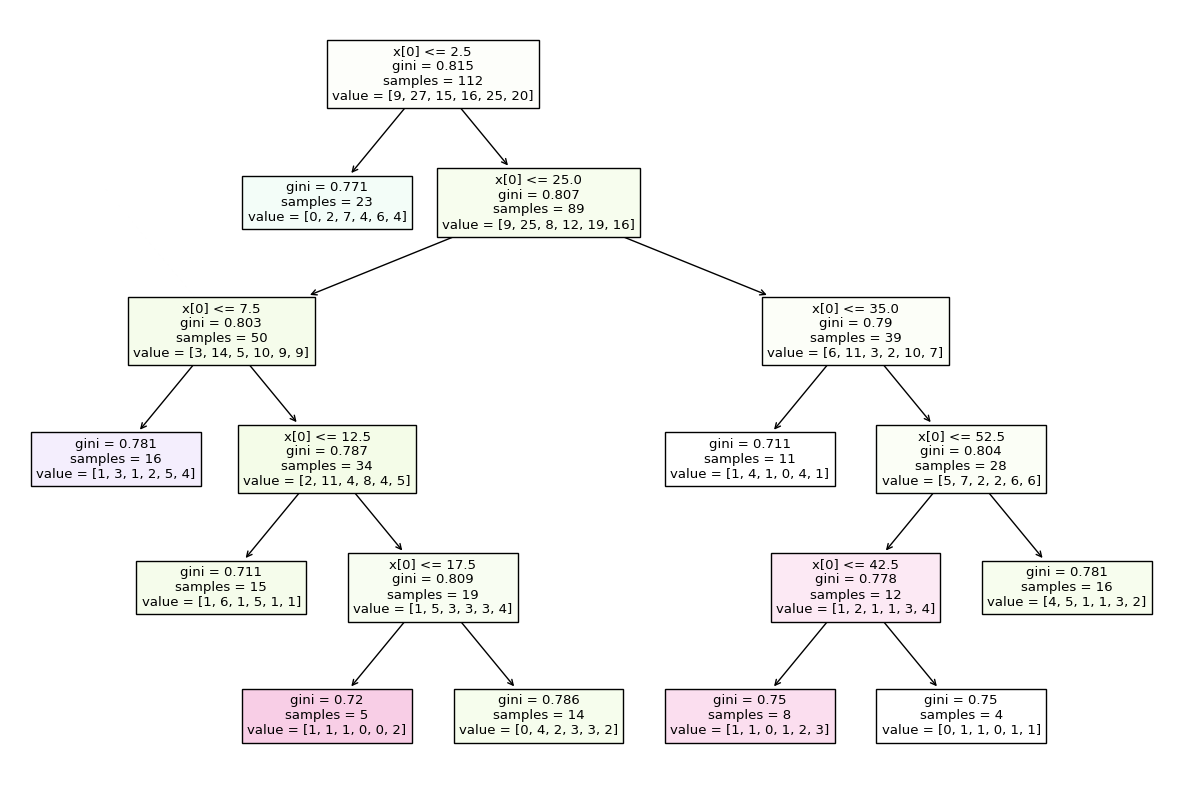

In [125]:
plt.figure(figsize=(15,10))
plot_tree(m, filled=True)
plt.show()

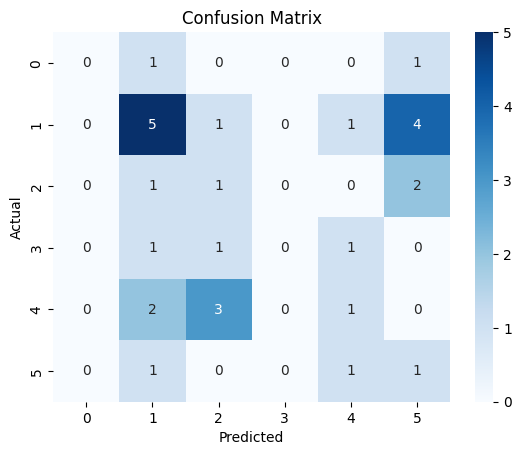

In [126]:
cm = confusion_matrix(f_test, f_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [128]:
rfr = RandomForestClassifier(n_estimators=100, random_state=42)

In [129]:
rfr.fit(s_train, f_train)

<ipython-input-129-b0a7d4041d68>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(s_train, f_train)


RandomForestClassifier(random_state=42)

In [130]:
f_pred = rfr.predict(s_test)

In [131]:
accuracy = rfr.score(s_test, f_test)
print('Accuracy:', accuracy)

Accuracy: 0.20689655172413793


<ipython-input-132-2e61db65a5e5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(s_train, f_train)


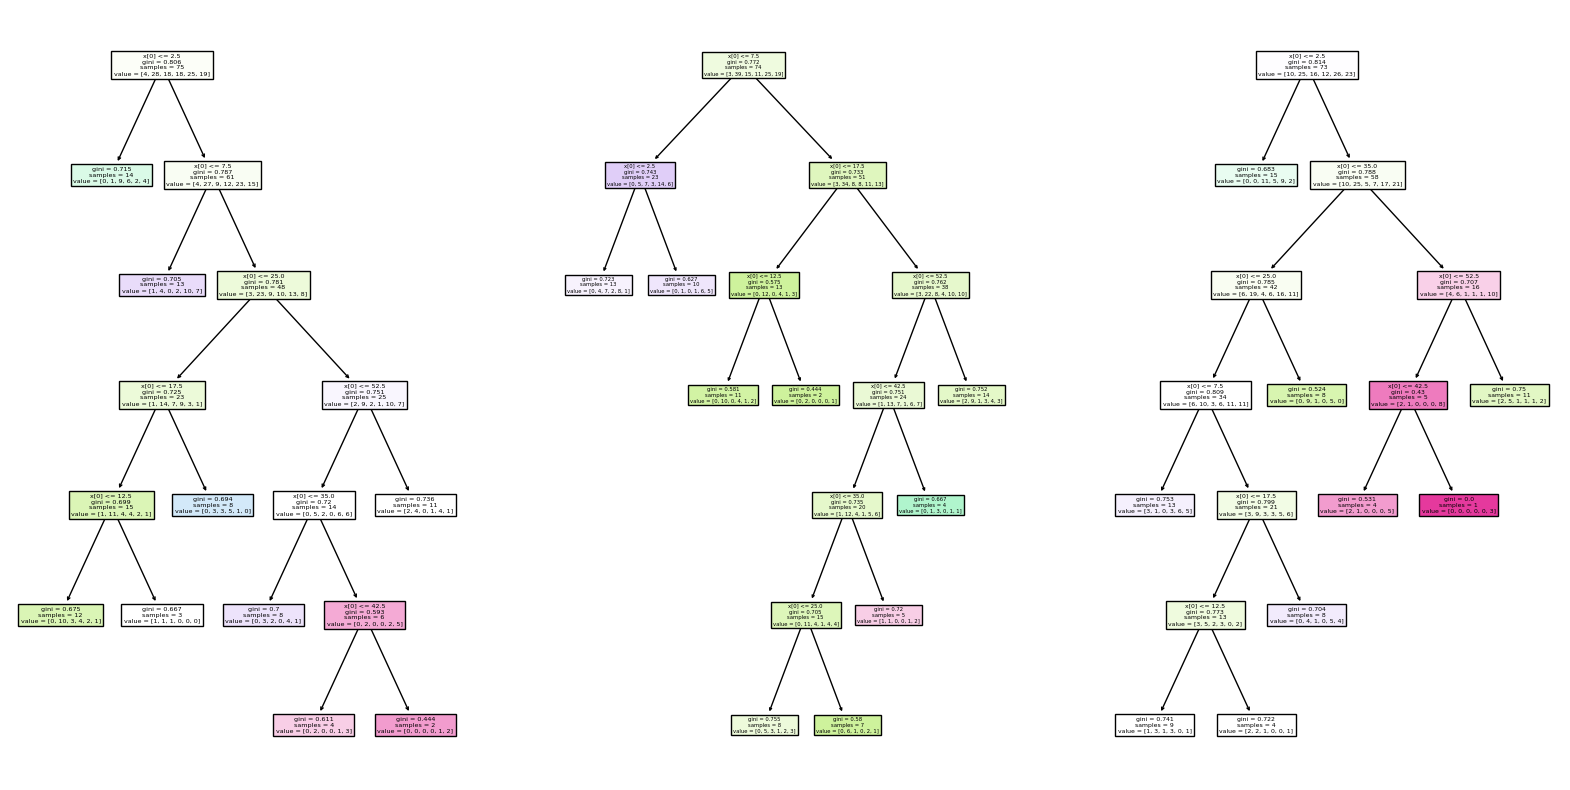

In [132]:
clf = RandomForestClassifier(n_estimators=3)
clf.fit(s_train, f_train)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
for i in range(len(clf.estimators_)):
    plot_tree(clf.estimators_[i], ax=axes[i], filled=True)
plt.show()

<ipython-input-134-a2e963d8f1fe>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(s_train, f_train)


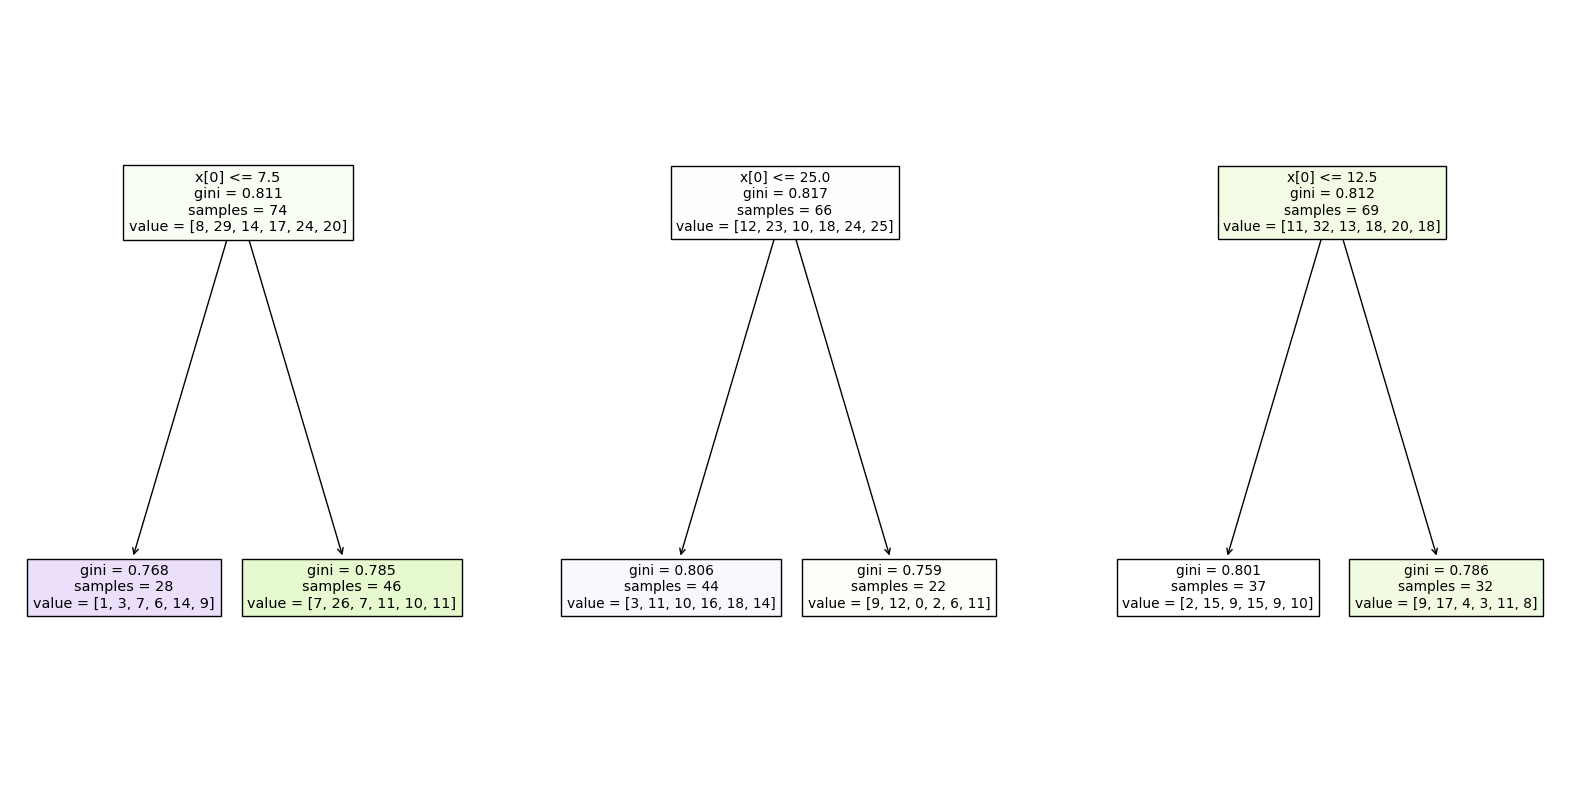

In [134]:
clf = RandomForestClassifier(n_estimators=3, max_depth=1, random_state=1234)
clf.fit(s_train, f_train)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
for i in range(len(clf.estimators_)):
    plot_tree(clf.estimators_[i], ax=axes[i], filled=True)
plt.show()